# Homework 2: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [6]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [7]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')




In [8]:
# store the velocity components and longitude/latitude data
# into numpy arrays

evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

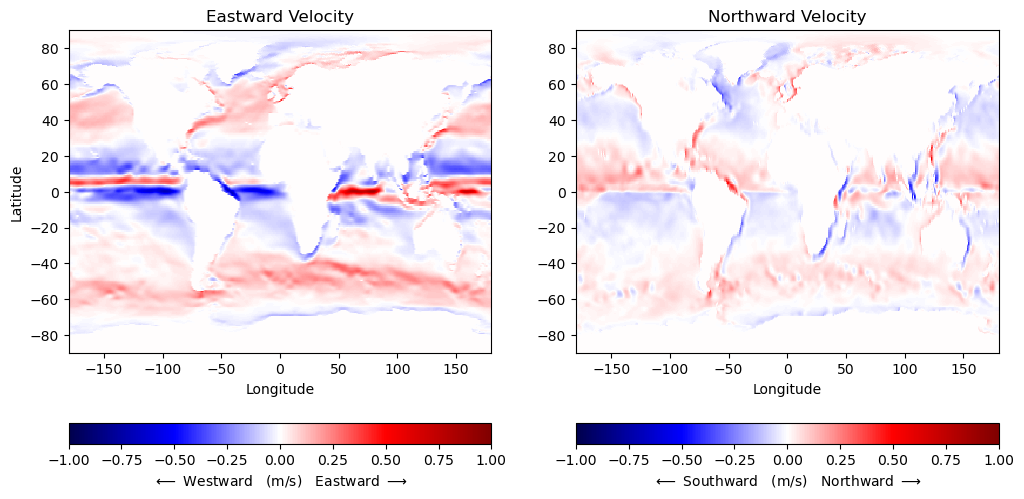

In [9]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(12,6))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

Answer:

1. Surface currents moving at:
30N, East Coast of the U.S.: On the east coast, at around 30°N, the currents appear to be moving northward based on the red shading in the Northward Velocity diagram. This is consistent with the flow of the Gulf Stream, which moves northward along the U.S. east coast.

30N, West Coast of the U.S.: On the west coast, at around 30°N, the currents are moving southward as indicated by the blue shading in the Northward Velocity diagram. This matches the California Current, which flows southward along the west coast of North America.

45N, East Coast of the U.S.: At around 45°N on the east coast, the current appears to be moving southward according to the Northward Velocity diagram (blue shading). This would be a continuation of the western boundary current moving into the North Atlantic Current, which eventually shifts direction further north.

45N, West Coast of the U.S.: At around 45°N on the west coast, the current is moving northward, indicated by the red shading in the Northward Velocity diagram. This corresponds to the Alaska Current, which flows northward along the Pacific Northwest.

2. The east coast current appears to flow faster than the west coast current, as shown by the more intense red and blue shading (greater velocity) along the east coast of the U.S. in both velocity diagrams (especially eastward velocity). The east coast is known for being a strong, fast-moving western boundary current.

3. The surface currents depicted in the diagrams are part of the larger gyre systems in both the North Atlantic and North Pacific. These gyres are circular ocean currents that rotate due to the Coriolis effect and are driven by wind patterns.

In [ ]:
### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [10]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [11]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
Z = np.array(ds_theta['Z'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

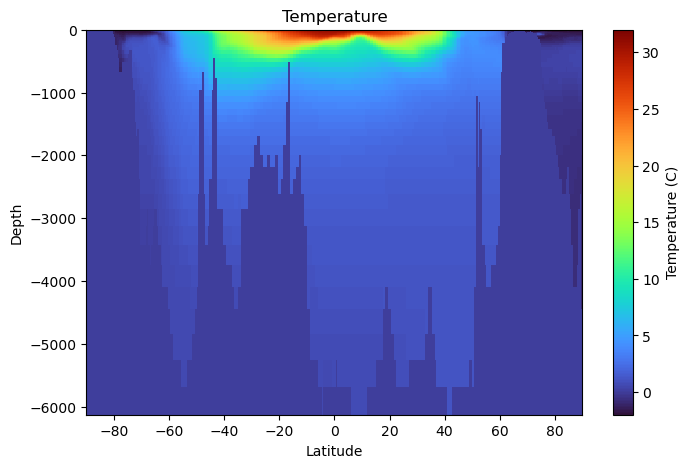

In [47]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
C = plt.pcolormesh(lat,Z,theta[0, :, :, 0], vmin = -2, vmax = 32, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Latitude');


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

Answer:

1.
West Coast: The water temperatures on the west coast of the U.S. (around 30-40°N) are relatively cooler at the surface compared to similar latitudes on the east coast. This is evident from the absence of the red/orange color indicating higher temperatures at those latitudes.

East Coast: In contrast, the east coast at the same latitudes shows warmer surface water temperatures, indicated by the yellow to orange shading on the temperature gradient scale.

2.
West Coast: The cooler temperatures on the west coast are primarily due to the California Current, a cold, southward-flowing current that brings cooler water from the North Pacific down along the western U.S. coast. This cool current reduces the sea surface temperature along the west coast.

East Coast: The east coast plays a significant role. This warm, fast-moving current flows northward from the tropics along the eastern coast of the U.S. It transports warm tropical waters into higher latitudes, resulting in warmer surface temperatures along the east coast compared to the west coast at the same latitudes.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [13]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvel = xr.open_dataset('WVELSTAR_2015_12.nc')

In [14]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [15]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_wvel['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

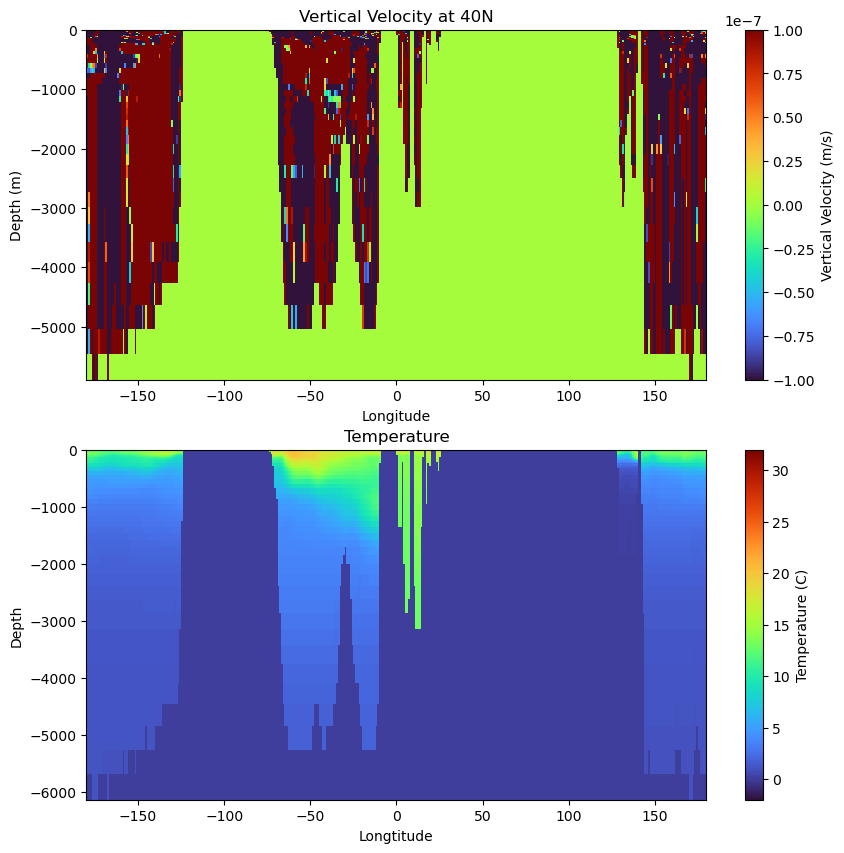

In [45]:

# Make a figure
fig = plt.figure(figsize=(10, 10))

# Subplot for vertical velocity
plt.subplot(2, 1, 1)
C = plt.pcolormesh(lon, Zl, wvel[0, :, 259, :], vmin=-0.0000001, vmax=0.0000001, cmap='turbo')  # Adjust color bounds based on data
plt.colorbar(C, label='Vertical Velocity (m/s)')
plt.title('Vertical Velocity at 40N')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')

# Subplot for temperature profile
plt.subplot(2, 1, 2)
C = plt.pcolormesh(lon, Z,theta[0, :, 259, :], vmin = -2, vmax = 32, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longtitude');






### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

Answer of part 3:

1. On the west coast of the U.S., such as along the California coastline, the vertical velocities are typically higher due to upwelling. Upwelling occurs when prevailing winds blow surface water away from the shore, causing colder, nutrient-rich water from deeper layers to rise to the surface. This process not only cools the surface water but also brings nutrients that support marine life.
On the east coast, particularly along the Gulf Stream, the vertical velocities are generally lower and might involve downwelling, where surface waters are pushed downward. This happens as the Gulf Stream moves warm waters northward along the coast, and these waters can sink as they cool or when they meet waters moving southward from northern latitudes.

2. Vertical velocities are generally much smaller than horizontal velocities because the ocean is much more stratified vertically, resisting vertical movement. The primary forcing mechanism for horizontal movement is the wind-driven circulation along with the Coriolis force, whereas vertical movement is primarily driven by density differences (thermal or saline) and wind stress curl (in specific areas leading to upwelling or downwelling).

3. Vertical currents can significantly impact surface temperatures. Upwelling, commonly associated with cooler, nutrient-rich waters from the deep, can lower surface temperatures, which is often observed along the west coasts of continents (like the west coast of the U.S.).
Downwelling carries warmer surface waters downward and can lead to warmer surface temperatures if it mixes with cooler waters below.

4. On the west coast of the U.S., the prevailing southward winds (like the California Current) can enhance upwelling. The wind stress on the ocean’s surface moves water away from the coast due to the Coriolis effect, leading to a replacement from deeper, colder waters that rise to the surface, increasing vertical velocities.